<a href="https://colab.research.google.com/github/Rendrikson98/Aprendizado-de-M-quina/blob/master/%C3%81rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1. Leitura dos dados com o Pandas**



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset - heart_failure_clinical_records_dataset.csv')
data.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**2. Limpeza dos dados com o Pandas**

In [3]:
#Verificar se existem valores NAN, ? ou dados faltantes
data = data.dropna()
#Excluir colunas irrelevantes
#data = data.drop(columns=['time'])
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**3. Re-escala dos dados**

In [4]:
data = (data - data.min())/(data.max()-data.min())
#converting age into int type

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


**4. Organizando dados da modelagem**

**Dividir os dados em atributos descritores e atributo de classe (target)**

In [5]:
X = data.iloc[:,0:12]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [6]:
y = data.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

**Dividir os dados em treino e teste**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
133,0.418182,0.0,0.021689,0.0,0.696970,1.0,0.327191,0.089888,0.914286,1.0,1.0,0.366548
261,0.400000,1.0,0.080633,0.0,0.393939,0.0,0.312644,0.022472,0.571429,0.0,0.0,0.814947
284,0.181818,1.0,0.003955,0.0,0.393939,0.0,0.307795,0.033708,0.800000,1.0,0.0,0.875445
279,0.272727,0.0,0.007783,1.0,0.363636,0.0,0.516305,0.089888,0.657143,0.0,0.0,0.861210
189,0.000000,0.0,0.028196,0.0,0.469697,1.0,0.302946,0.044944,0.771429,0.0,0.0,0.604982


In [8]:
y_train.head()

133    0.0
261    0.0
284    0.0
279    0.0
189    0.0
Name: DEATH_EVENT, dtype: float64

**Definindo algoritmo de aprendizado**

In [9]:
from sklearn.tree import DecisionTreeClassifier
#definindo modelo
classificador = DecisionTreeClassifier()
#treinando modelo
classificador.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
from sklearn.tree import plot_tree

In [11]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (100,100)

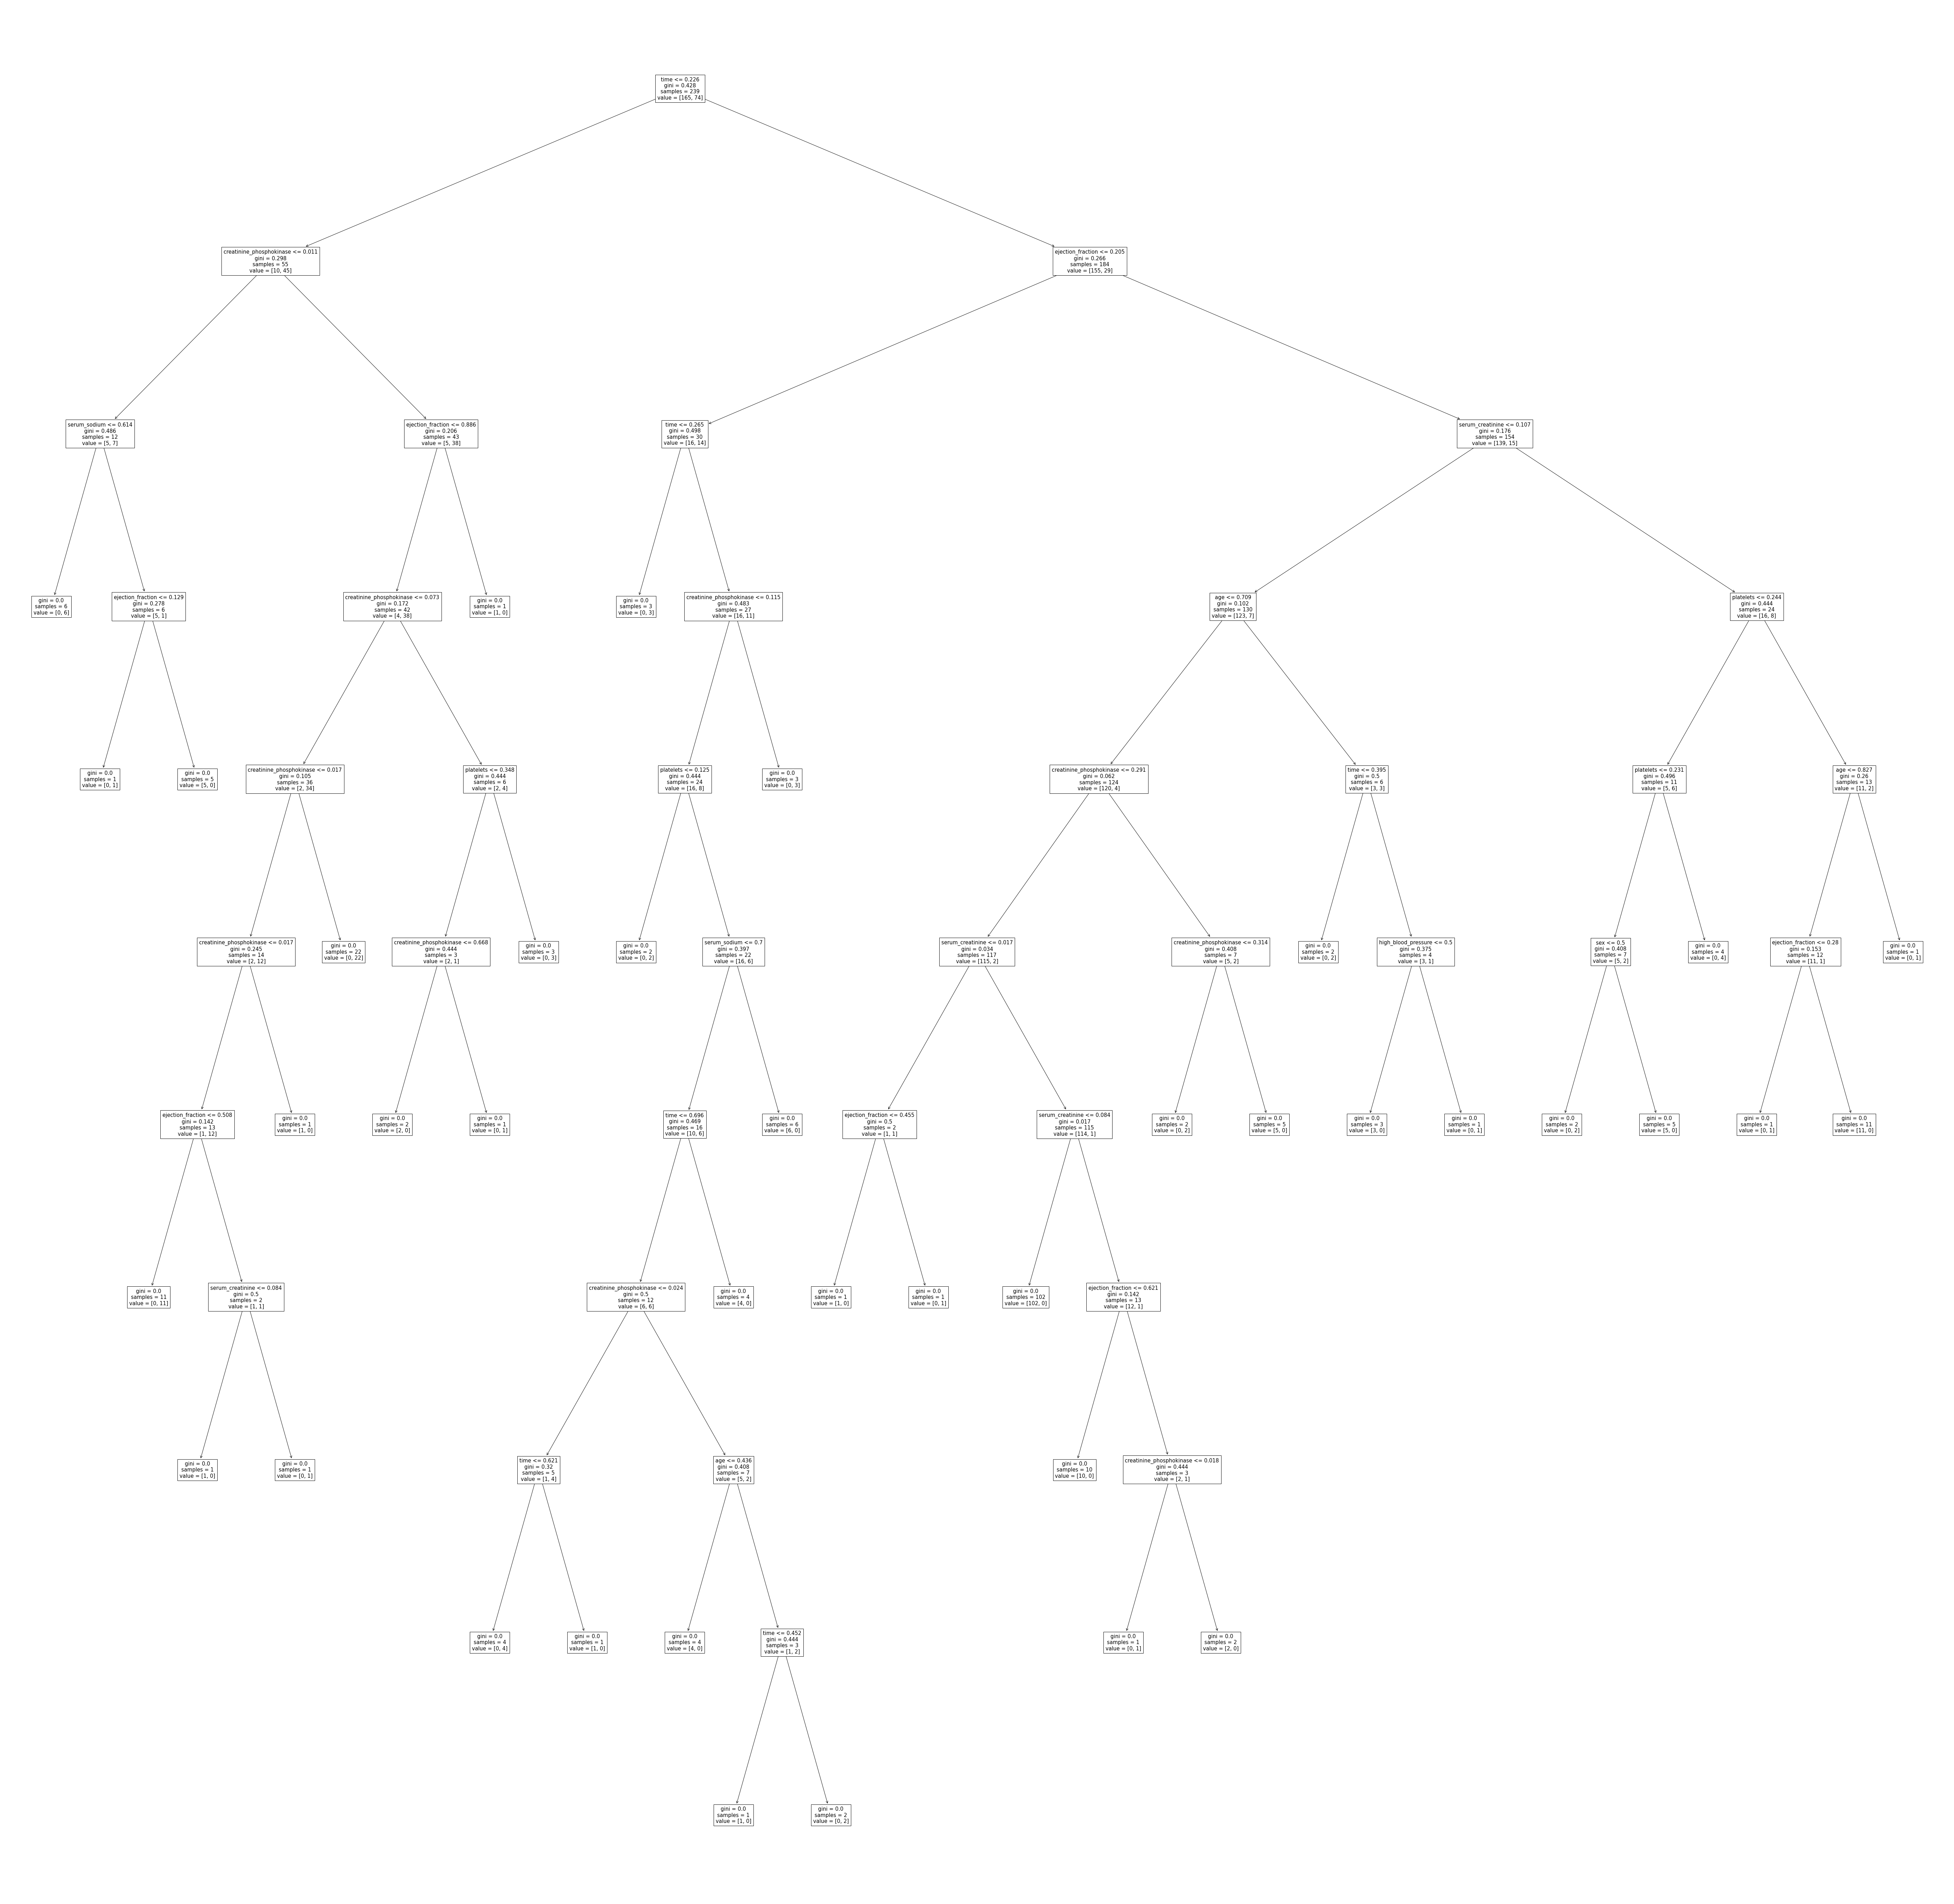

In [12]:

plot_tree(classificador,feature_names=data.columns[0:12])
plt.show()

In [13]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (8,6)
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0.])

In [14]:

for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
1.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0


**6. Valiação do Classificador**

In [15]:
#calculando acurácia
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test,classificacao)
acuracia

0.8333333333333334

In [16]:
#calculando precisão
from sklearn.metrics import precision_score

precisao = precision_score(y_test,classificacao)
precisao

0.8

In [17]:
#calculando recall (revocação)
from sklearn.metrics import recall_score
recall = recall_score(y_test,classificacao)
recall

0.7272727272727273

In [18]:
#calculando f1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test,classificacao)
f1

0.761904761904762

**Curva de ROC**

In [19]:
#plotando curva roc
from sklearn.metrics  import roc_curve

fpr, tpr, _ = roc_curve(y_test,classificacao)

fpr


array([0.        , 0.10526316, 1.        ])

In [20]:
tpr

array([0.        , 0.72727273, 1.        ])

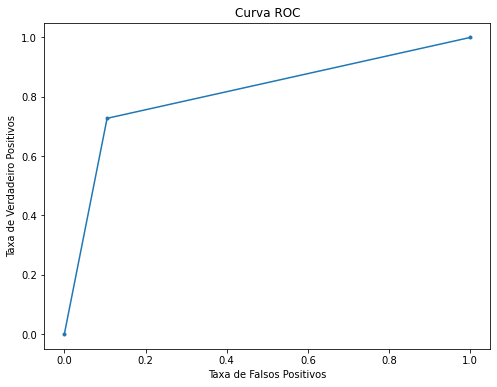

In [21]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

**Área sob a curva (Area under the curve - AUC)**

In [22]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

erro = roc_auc_score(y_test,classificacao)
erro

0.8110047846889952

**Validação cruzada**

In [23]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298] 
Teste: [ 0  1  2  3 

In [24]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

#define modelo
classificador = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.33333333, 0.73333333, 0.76666667, 0.86666667, 0.76666667,
       0.8       , 0.6       , 0.56666667, 0.7       , 0.62068966])

In [25]:
scores.mean(),scores.std()

(0.6754022988505748, 0.14499643505214405)

**7. Comparando Árvore de Decisão com Random Forest**

In [26]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,y_test)

0.8666666666666667

In [29]:
#calculando acurácia da random forest
floresta.score(X_train,y_train)

1.0

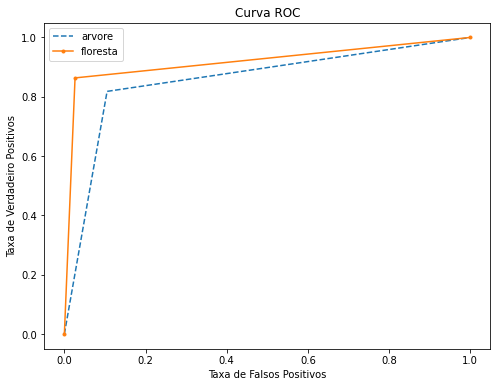

In [30]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)

#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [31]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.679, 0.158)

In [32]:
#criando árvore
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.786, 0.163)

**8. Interpretação dos dados**

Nossa árvore de decisão foi desenvolvida para verificar a acuaracia comparados as demais classes com o evento de morte. 
Nosso algoritimo tivemos como resultado uma taxa de acuracia ficou entre 68% e 80%, a taxa de precisão foi entre 60% a 80%.
Observando a árvore de decisão gerada com os dados e os demais gráficos podemos observa que:
*   Se um indivíduo tem mais de um componente que afeta a saúde do coração em um nível grave, as chances de sua morte serão maiores. 
* Se um paciente tem mais 
plaquetas, mais concentração de sódio, menos creatinina_fosfoquinase, mais fração de ejeção, menos soro_creatinina, mais período de acompanhamento em seu sangue, então eles sobreviverão de uma insuficiência cardíaca. 
* Se um usuário tiver mais componentes no controle do que aqueles que não estão no controle, eles provavelmente sobreviverão. 

Portanto, isso prova que todos os fatores contínuos são independentes uns dos outros e estão relacionados apenas com a variável de destino (morte_evento). A maioria por cento das pessoas sobreviveu à doença cardíaca.